# Data Aquisition



In [10]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    print("Downloading...")
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    print("Extracting...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()


### Run the following code in your terminal window to install required dependencies

```
conda install -c conda-forge opencv
```

and then 

```
conda install -c conda-forge pathlib
```


In [ ]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Extracting...


# Problem Formulation 

With this numerical data, we find that the folder is split into two categories - cats and dogs. Since this data is appropriately grouped, we can use this model for classification purposes. Once we train our model, we can use it to discern images based on their properties.


# Preprocessing

Once retrieving the data, we now want to store these images with a numerical representation. Since they are .JPG files, we can decompose them into 3 matrices representing the levels of intensity of red, green, and blue. This is known as an RGB Tensor.

In [46]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cats_and_dogs_filtered/train"

sub_directories = ["cats", "dogs"]
size = 128 #adjusting pixel size 

tensors = [] #storing image as 3d tensor
classification = [] # 1 for dog & 0 for cat


for label, directory in enumerate(sub_directories):
    sub_folder_path = os.path.join(folder_path, directory)
    for filename in os.listdir(sub_folder_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(sub_folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"{filename} not found")
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (size, size))
            tensor = img_resized.astype('float32') / 255.0
            tensors.append(tensor)
            classification.append(label)  # 0 for cat, 1 for dog

tensors = np.array(tensors)
classification = np.array(classification)

print(f"tensor shape: {tensors.shape}")

tensor shape: (2000, 128, 128, 3)


We can display these images based on their classification value. Let's start by displaying a randomly chosen dog along with its numerical description.

Tensor array for dog.778.jpg:
[[[0.26666668 0.39215687 0.12941177]
  [0.21960784 0.34117648 0.06666667]
  [0.4627451  0.5803922  0.2901961 ]
  ...
  [0.2784314  0.50980395 0.5803922 ]
  [0.26666668 0.49411765 0.54901963]
  [0.15686275 0.36862746 0.41568628]]

 [[0.07450981 0.20392157 0.        ]
  [0.3137255  0.44705883 0.15686275]
  [0.5372549  0.65882355 0.36078432]
  ...
  [0.28235295 0.5137255  0.58431375]
  [0.2784314  0.5058824  0.56078434]
  [0.16862746 0.3764706  0.43137255]]

 [[0.27450982 0.41960785 0.11764706]
  [0.03137255 0.16470589 0.        ]
  [0.56078434 0.68235296 0.36862746]
  ...
  [0.27450982 0.5019608  0.5803922 ]
  [0.2627451  0.4862745  0.5529412 ]
  [0.15294118 0.36078432 0.42352942]]

 ...

 [[0.77254903 0.9019608  0.5921569 ]
  [0.78039217 0.9098039  0.5921569 ]
  [0.5803922  0.7176471  0.3882353 ]
  ...
  [0.49411765 0.6156863  0.3019608 ]
  [0.47058824 0.6039216  0.23529412]
  [0.7137255  0.85490197 0.43137255]]

 [[0.6666667  0.7921569  0.49803922]
  [0.81

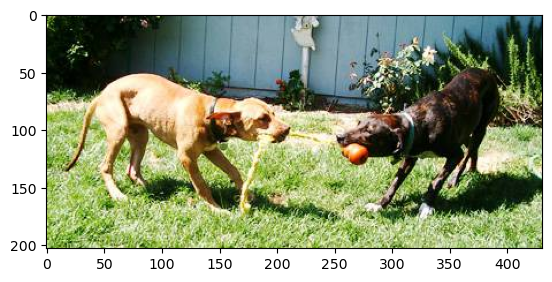

In [ ]:
import random 

number = random.randint(0,999)
dog_folder = 'cats_and_dogs_filtered/train/dogs'
iteration = 0

file_choice = dog_folder + "/dog." + str(number) + ".jpg"

img = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_dog = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_dog.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {filename}:")
print(tensor)
print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
plt.imshow(img_dog)
plt.show()
        


Now... let's display a cat!

Tensor array for cats_and_dogs_filtered/train/cats/cat.733.jpg:
[[[0.5058824  0.5058824  0.5058824 ]
  [0.5019608  0.5019608  0.5019608 ]
  [0.49803922 0.49803922 0.49803922]
  ...
  [0.43529412 0.39607844 0.34901962]
  [0.43529412 0.39607844 0.34901962]
  [0.43529412 0.39607844 0.34901962]]

 [[0.5058824  0.5058824  0.5058824 ]
  [0.5019608  0.5019608  0.5019608 ]
  [0.49803922 0.49803922 0.49803922]
  ...
  [0.43529412 0.39607844 0.34901962]
  [0.42745098 0.3882353  0.34117648]
  [0.42352942 0.38431373 0.3372549 ]]

 [[0.5019608  0.5019608  0.5019608 ]
  [0.49803922 0.49803922 0.49803922]
  [0.49803922 0.49803922 0.49803922]
  ...
  [0.44313726 0.40392157 0.35686275]
  [0.42745098 0.3882353  0.34117648]
  [0.41568628 0.3764706  0.32941177]]

 ...

 [[0.49803922 0.47058824 0.4       ]
  [0.5019608  0.4745098  0.40392157]
  [0.49411765 0.46666667 0.39607844]
  ...
  [0.6313726  0.5647059  0.44705883]
  [0.6313726  0.5686275  0.43529412]
  [0.65882355 0.6        0.44705883]]

 [[0.49019

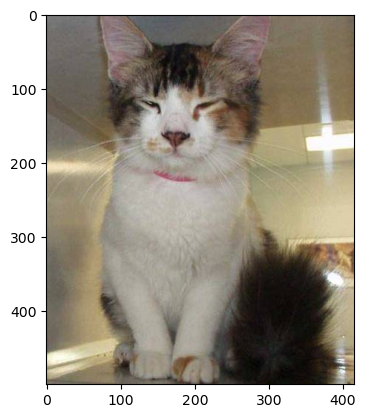

In [80]:
import random 

new_number = random.randint(0,999)
cat_folder = 'cats_and_dogs_filtered/train/cats'
iteration = 0

file_choice = cat_folder + "/cat." + str(new_number) + ".jpg"

img_cat = cv2.imread(file_choice)
if img is None:
    print(f"Warning: Unable to read {file_choice}")

    # Convert BGR to RGB
img_rgb = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)

    # Convert to tensor (normalized float32 numpy array)
tensor = img_rgb.astype('float32') / 255.0

    # Print the tensor array
print(f"Tensor array for {file_choice}:")
print(tensor)


plt.imshow(img_rgb)
plt.show()

We turned these images into 3 matrices (188x188) x 3 (a tensor) to describe the intensity values of red, blue, and green in the image. To improve computational complexity, we will turn the image greyscale so it is composed of a (188 x 188) x 1 matrix

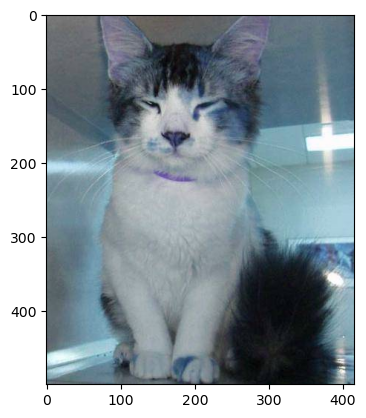

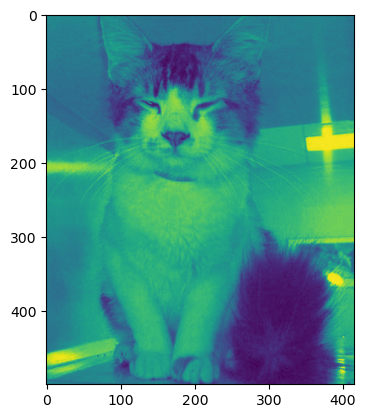

In [ ]:
grayscale_cat = cv2.cvtColor(img_cat,cv2.COLOR_RGB2GRAY)

plt.imshow(img_cat)         #regular
plt.show()
plt.imshow(grayscale_cat)   #greyscale
plt.show()


We can do the same for the images of the dogs.

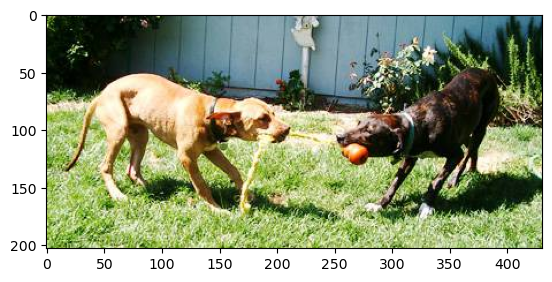

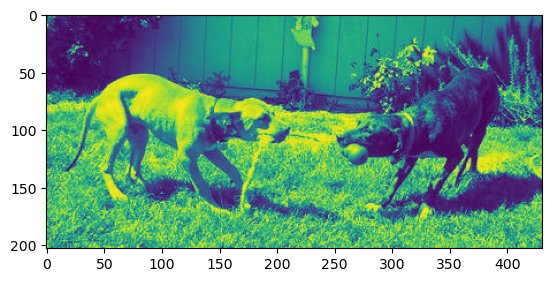

In [86]:

grayscale_dog  = cv2.cvtColor(img_dog,cv2.COLOR_RGB2GRAY)

plt.imshow(img_dog)         #regular
plt.show()
plt.imshow(grayscale_dog)   #greyscale
plt.show()

In [98]:
grey_matrices = []

iteration = 0
for tensor in tensors:
    greyscale_matrix = cv2.cvtColor(tensor,cv2.COLOR_RGB2GRAY)
    grey_matrices.append(greyscale_matrix)

# Data Processing (II)

The next stage in image processing is Feature Learning. This process is broken down into three distinct steps. Since we previously 

## Convolution:

We apply a series of linear transformations to the image in order to sharpen the image, reduce complexity, and assist with edge detection. Below is a visualization of how this matrix (kernel) adjusts the greyscale matrix. 

![](https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif)


In [107]:

#Sobel X kernel

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])


kH, kW = kernel.shape
pad_h = kH // 2
pad_w = kW // 2

conv_one = []
for matrix in grey_matrices:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_one.append(output)  # append the correct output, not conv_one[0]


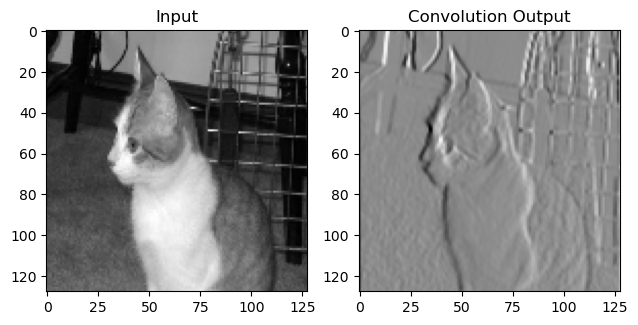

In [ ]:
# Visualize input and output
plt.subplot(1, 2, 1)
plt.title("greyscale matrix")
plt.imshow(grey_matrices[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Convolution Output")
plt.imshow(conv_one[0], cmap='gray')

plt.tight_layout()
plt.show()

We will repeat the process a various times to improve edge detection.

In [ ]:
conv_two = []
for matrix in conv_one:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_two.append(output) 

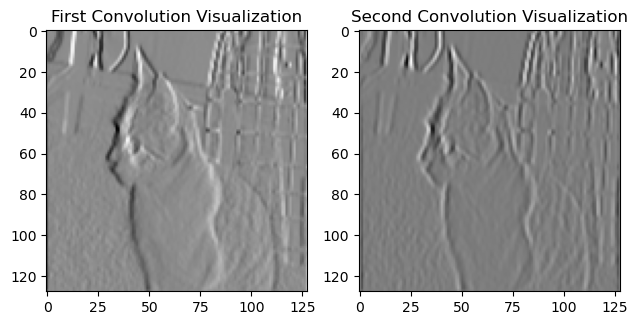

In [ ]:
plt.subplot(1, 2, 1)
plt.title("First Convolution Visualization")
plt.imshow(conv_one[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Second Convolution Visualization")
plt.imshow(conv_two[0], cmap='gray')

plt.tight_layout()
plt.show()

We will now run our final convolution layer.

In [ ]:
conv_three = []
for matrix in conv_two:
    # Pad the input tensor with zeros
    padded_input = np.pad(matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(matrix)

    # Perform convolution manually
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_input[i:i + kH, j:j + kW]

            # Ensure region and kernel have same shape
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    conv_three.append(output) 

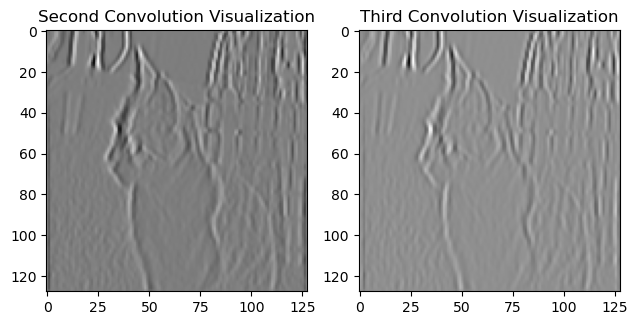

In [106]:
plt.subplot(1, 2, 1)
plt.title("Second Convolution Visualization")
plt.imshow(conv_two[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Third Convolution Visualization")
plt.imshow(conv_three[0], cmap='gray')

plt.tight_layout()
plt.show()

# Data Processing (III)
### ReLU - Rectified Linear Unit

For the next stage of processing, we will perform a layer of ReLU operations. The ReLU function is a piecewise continuous function which maps negative values to zero and positive values to themselves. The equation for the relu function is given by


$$f(x) = \begin{cases} x \quad x > 0\\ 0 \quad x \leq 0 \end{cases}$$


![](https://media.geeksforgeeks.org/wp-content/uploads/20250129162127770664/Relu-activation-function.png)

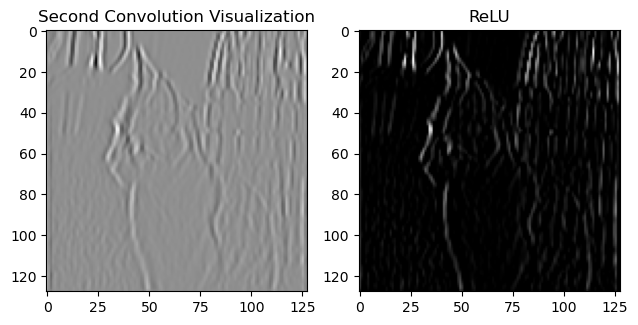

In [ ]:
relu_matrices = []
for conv_matrix in conv_three:
    relu_matrix = np.maximum(0, conv_matrix)
    relu_matrices.append(relu_matrix)

#print(relu_matrices[0])

plt.subplot(1, 2, 1)
plt.title("Second Convolution Visualization")
plt.imshow(conv_three[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("ReLU output")
plt.imshow(relu_matrices[0], cmap='gray')

plt.tight_layout()
plt.show()




# Data Processing (IV)

### Pooling

Similarly to algorithms covered such as PCA (Principal Component Analysis), Pooling is a tactic used for dimensionality reduction while preserving the key characteristics of the image. for the purposes of our CNN, we will be using max pooling, choosing the maximum value from a region of the mapped values.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

In [ ]:
pooled_matrices = []

for matrix in relu_matrices:
    N, M = matrix.shape
    K, L = 2, 2  # Pool size
    MK = N // K
    NL = M // L
    # Crop to fit pooling window
    cropped = matrix[:MK*K, :NL*L]
    # Reshape and pool
    pooled = cropped.reshape(MK, K, NL, L).max(axis=(1, 3))
    pooled_matrices.append(pooled)

print(f"Pooled shape: {pooled_matrices[0].shape}")



Pooled shape: (64, 64)


Now to visualize the transformation

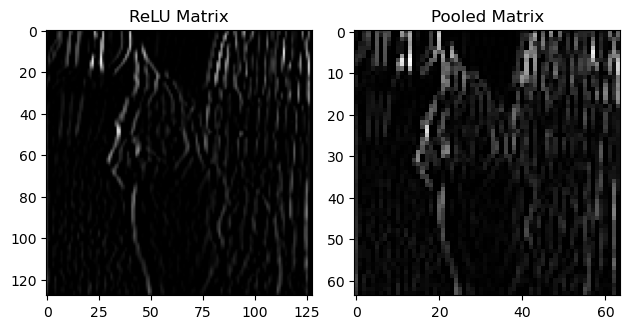

In [151]:
plt.subplot(1, 2, 1)
plt.title("ReLU Matrix")
plt.imshow(relu_matrices[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Pooled Matrix")
plt.imshow(pooled_matrices[0], cmap='gray')

plt.tight_layout()
plt.show()
